In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [134]:
dataset_url = 'test.csv'
data2 = pd.read_csv(dataset_url)

In [135]:
dataset_url = 'train.csv'
data1 = pd.read_csv(dataset_url)

In [136]:
data1.shape

(1600, 6)

In [137]:
data1

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [138]:
#Normalization
#data1= (data1-data1.mean())/(data1.std())
X=data1[['feature_1','feature_2','feature_3','feature_4','feature_5']]
Y=data1['target']

In [139]:
data2

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.219276,-1.500923,0.450941,0.900056,-0.233720,-94.466301
1,-0.938644,-0.641441,0.758345,1.430675,-1.041783,-24.768983
2,0.722544,-0.113178,-0.069967,-1.823750,0.325824,-39.852810
3,-0.417660,-1.745068,-0.800669,-1.463815,0.995208,-226.279598
4,0.261871,-0.838568,1.304020,0.663720,-0.909815,-55.025304
...,...,...,...,...,...,...
395,-1.005294,-1.099932,0.775225,-0.186844,0.762528,-122.190306
396,-1.475778,0.359080,-0.891748,-0.713098,0.017139,-13.325040
397,-0.251353,-1.231131,-0.169452,1.119469,2.156396,-69.073439
398,0.282031,0.736083,-0.456391,0.760166,0.585223,92.801436


In [140]:
X_test=data2[['feature_1','feature_2','feature_3','feature_4','feature_5']]
Y_test=data2['target']

In [147]:
def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum((X.dot(B)-Y) ** 2)/(2 * m)
 return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
 cost_history = [0] * iterations
 m = len(Y)
 
 for iteration in range(iterations):
 # Hypothesis Values
     h = X.dot(B)
 # Difference b/w Hypothesis and Actual Y
     loss = h-Y
 # Gradient Calculation
     gradient = X.T.dot(loss) / m
     B = B-alpha * gradient
 # New Cost Value
     cost = cost_function(X, Y, B)
     cost_history[iteration] = cost
     #print(cost)
 return B, cost_history

In [149]:
# Initial Coefficients
B = np.zeros(X.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X, Y, B, alpha, iter_)
print(cost_history)

[6067.321982371566, 6007.205238551349, 5947.708494726954, 5888.825337310488, 5830.54941925535, 5772.8744593638685, 5715.794241602181, 5659.30261442224, 5603.393490090913, 5548.060844026061, 5493.29871413957, 5439.101200187206, 5385.462463125284, 5332.376724474016, 5279.8382656875265, 5227.841427530431, 5176.380609460909, 5125.450269020224, 5075.044921228605, 5025.159137987427, 4975.787547487637, 4926.924833624336, 4878.565735417477, 4830.705046438598, 4783.337614243539, 4736.458339811069, 4690.0621769873715, 4644.144131936321, 4598.699262595495, 4553.722678137848, 4509.20953843901, 4465.155053550137, 4421.554483176254, 4378.403136160031, 4335.696369970962, 4293.429590199848, 4251.598250058553, 4210.197849884994, 4169.223936653259, 4128.672103488865, 4088.5379891890466, 4048.817277748049, 4009.505697887378, 3970.599022590934, 3932.093068645003, 3893.983696183029, 3856.2668082351447, 3818.938350282383, 3781.9943098155477, 3745.430715898669, 3709.243638737017, 3673.429189249613, 3637.9835

In [150]:
print(newB)

feature_1    29.690770
feature_2    92.515982
feature_3     8.056687
feature_4    44.561565
feature_5     2.563661
dtype: float64


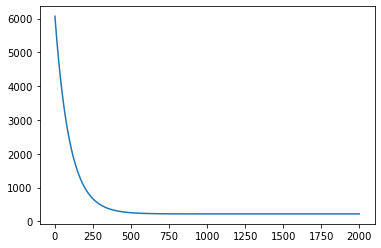

In [121]:
plt.plot(cost_history)

In [122]:
def pred(X_test, newB):
 return X_test.dot(newB)

In [123]:
y_ = pred(X_test,newB)

In [124]:
print(y_)

0      -89.207029
1      -20.020520
2      -70.015410
3     -242.976541
4      -32.055781
          ...    
395   -131.734708
396    -49.513666
397    -67.313801
398    108.170644
399   -125.780483
Length: 400, dtype: float64


In [125]:
y_[3]

-242.97654137386854

In [126]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
r2(y_,Y_test)

0.9661229797840724

In [128]:
data2 

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.219276,-1.500923,0.450941,0.900056,-0.233720,-94.466301
1,-0.938644,-0.641441,0.758345,1.430675,-1.041783,-24.768983
2,0.722544,-0.113178,-0.069967,-1.823750,0.325824,-39.852810
3,-0.417660,-1.745068,-0.800669,-1.463815,0.995208,-226.279598
4,0.261871,-0.838568,1.304020,0.663720,-0.909815,-55.025304
...,...,...,...,...,...,...
395,-1.005294,-1.099932,0.775225,-0.186844,0.762528,-122.190306
396,-1.475778,0.359080,-0.891748,-0.713098,0.017139,-13.325040
397,-0.251353,-1.231131,-0.169452,1.119469,2.156396,-69.073439
398,0.282031,0.736083,-0.456391,0.760166,0.585223,92.801436
